In [827]:

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [828]:
df = pd.read_excel("marketing_data.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,111,189,218,1,4,4,6,1,1,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,7,0,37,1,7,3,7,5,1,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,15,2,30,1,3,2,5,2,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,0,1,1,0,2,7,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,11,0,34,2,3,1,2,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,47,48,78,2,5,2,11,4,0,0
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,3,8,16,1,1,0,3,8,0,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,15,5,14,2,6,1,5,8,0,0
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,149,165,63,1,5,4,10,3,0,0


## Data Profiling


In [829]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
Response                 int64
Complain                 int64
dtype: object

In [830]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Response                0
Complain                0
dtype: int64

## Year Birth


### Check the unique values of year birth attribute


In [831]:
df['Year_Birth'].unique()

array([1970, 1961, 1958, 1967, 1989, 1954, 1947, 1979, 1959, 1981, 1969,
       1977, 1960, 1966, 1976, 1965, 1956, 1975, 1971, 1986, 1972, 1974,
       1990, 1987, 1984, 1968, 1955, 1983, 1973, 1978, 1952, 1962, 1964,
       1982, 1963, 1957, 1980, 1945, 1949, 1948, 1953, 1946, 1985, 1992,
       1944, 1951, 1988, 1950, 1994, 1993, 1991, 1893, 1996, 1995, 1899,
       1943, 1941, 1940, 1900], dtype=int64)

### I will use the current date as basis and I can see years, such as 1893, 1899, and 1900, which are not realistically alive in year 2024. That is why I will be removing the years with those rows


In [832]:
df = df[~df['Year_Birth'].isin([1893, 1899, 1900])]

# check if the rows are removed
# df[df['Year_Birth'] == 1893]
# df[df['Year_Birth'] == 1899]
df[df['Year_Birth'] == 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain


## Marital Status


#### Replace the values that are not marital status. Alone can be interpreted as Single. Yolo and Absurd are just some random status that can be considered as input errors OR outliers. For now, I'll consider it as Single.

#### I will not change values 'Together', 'Widow', and 'Divorced' because it gives a valid representation of their life situations


In [833]:
df['Marital_Status'] = df['Marital_Status'].replace(
    {'YOLO': 'Single', 'Absurd': 'Single', 'Alone': 'Single'})

df['Marital_Status'].unique()

C:\Users\JOSHUA KYLE\AppData\Local\Temp\ipykernel_14644\1309742623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Marital_Status'] = df['Marital_Status'].replace(


array(['Divorced', 'Single', 'Married', 'Together', 'Widow'], dtype=object)

## Education


#### Check the unique values of education


In [834]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

## Complain


#### Check if all the values are 0 and 1 only


In [835]:
df['Complain'].unique()

array([0, 1], dtype=int64)

#### Use count plot to visualize the number of customers who complained vs who haven't


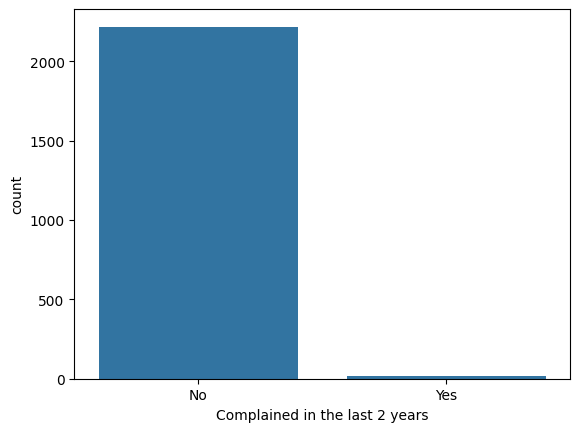

In [836]:
sns.countplot(x='Complain', data=df)
plt.xlabel('Complained in the last 2 years')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

## Income


#### Check the descriptive statistics of the Income


In [837]:
df['Income'].describe()

count      2213.000000
mean      52236.581563
std       25178.603047
min        1730.000000
25%       35246.000000
50%       51373.000000
75%       68487.000000
max      666666.000000
Name: Income, dtype: float64

#### Check the number of null values in Income


In [838]:
df['Income'].isnull().sum()

24

#### Check the number of null values in Income with relation to unique combinations of Marital Status and Education


In [839]:
num_null_income_in_unique_combinations = df[df['Income'].isnull()].groupby(
    ['Marital_Status', 'Education']).size().reset_index(name='Count')
num_null_income_in_unique_combinations

,Marital_Status,Education,Count
0,Married,2n Cycle,1
1,Married,Graduation,4
2,Married,PhD,2
3,Single,2n Cycle,1
4,Single,Graduation,6
5,Single,PhD,2
6,Together,2n Cycle,1
7,Together,Graduation,1
8,Together,Master,4
9,Together,PhD,1


#### Check if the Income is skewed or symmetric to decided if I'm goind to use median (if skewed) or mean (if symmetric)


In [840]:
skewness = df['Income'].skew()
print(f"Skewness of Income: {skewness}")

Skewness of Income: 6.768708069795488


This is right-skewed. In this case, it is preferred to use median to deal with the values.

But there are many factors to consider when removing or filling in the null values of Income. Filling it to 0 may be a bad practice because it may be a misrepresentation of data or can skew the distribution.


#### Fill null values of Income with the median of their respective groups


In [841]:
# df['Income'] = df.groupby(['Marital_Status', 'Education'])[
#     'Income'].transform(lambda x: x.fillna(x.median()))

# df['Income'].isnull().sum()

#### fill null values of Income with 0


In [842]:
# df['Income'] = df['Income'].fillna(0)

#### Remove rows with null value of income


In [843]:
df = df.dropna(subset=['Income'])

#### Use histogram plot to check the distribution of the Income


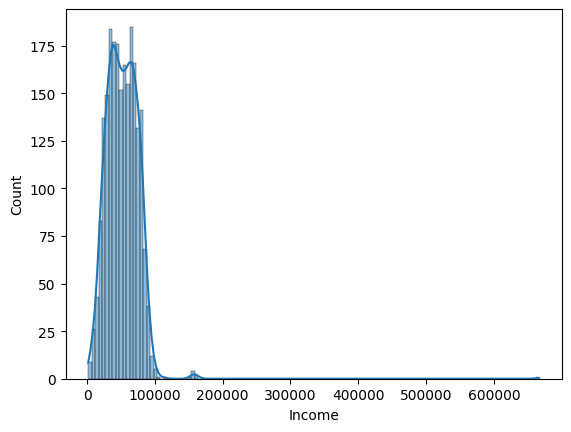

In [844]:
sns.histplot(df['Income'], kde=True)
plt.xlabel('Income')
plt.show()

#### Use scatter plot to identify potential outleirs in Income


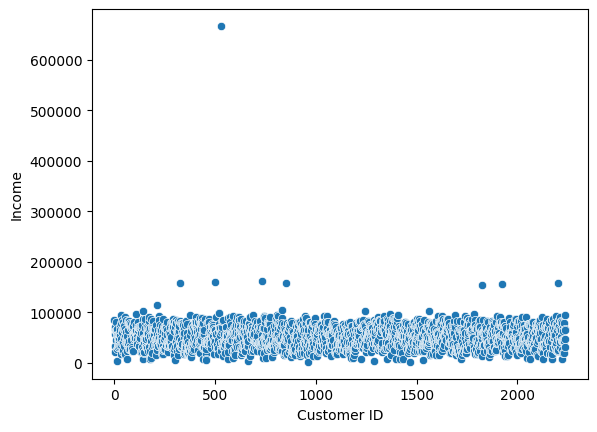

In [845]:
sns.scatterplot(df['Income'])
plt.xlabel('Customer ID')
plt.show()

#### Remove outliers in income


Using the Interquartile Range


In [846]:
# Q1 = df['Income'].quantile(0.25)
# Q3 = df['Income'].quantile(0.75)
# IQR = Q3 - Q1

# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# df = df[(df['Income'] >= lower_bound) & (df['Income'] <= upper_bound)]

Using Z-scores made by the great Andy


In [847]:
from scipy.stats import zscore


def remove_outliers(data, column, z_thresh=2):
    z_scores = np.abs(zscore(data[column], nan_policy='omit'))

    non_outlier_indices = np.where(z_scores < z_thresh)[0]

    no_outliers = data.iloc[non_outlier_indices]
    return no_outliers


df = remove_outliers(df, 'Income', z_thresh=2)

## Check the relationship of education and marital status with Income and Complain


#### Check the correlation between Income and Education


In [848]:
education_income_values = pd.get_dummies(
    df, columns=['Education'], prefix='Education')

education_columns = [
    col for col in education_income_values.columns if 'Education_' in col]
income_education_correlation = education_income_values[[
    'Income'] + education_columns].corr()['Income'][1:]

print("Correlation between Income and Education Levels:")
print(income_education_correlation)

Correlation between Income and Education Levels:
Education_2n Cycle     -0.060198
Education_Basic        -0.240717
Education_Graduation    0.017950
Education_Master        0.022924
Education_PhD           0.089871
Name: Income, dtype: float64


All the relationships here are weak, indicating that education level is not a strong predictor of income of customers


#### Check the correlation between Complain and Education


In [849]:
from scipy.stats import chi2_contingency

education_contingency_table = pd.crosstab(df['Education'], df['Complain'])
chi2, p, dof, expected = chi2_contingency(education_contingency_table)
print(f"Chi-square Test: p-value = {p}")

Chi-square Test: p-value = 0.20448089104646516


With the p-value(0.203) being greater than 0.05, this means that there is not enough evidence to associate education with the customer complaint in the last 2 years


#### Check the correlation between Income and Marital Status


In [850]:
marital_income_values = pd.get_dummies(
    df, columns=['Marital_Status'], prefix='Marital_Status')

marital_columns = [
    col for col in marital_income_values.columns if 'Marital_Status_' in col]
income_marital_correlation = marital_income_values[[
    'Income'] + marital_columns].corr()['Income'][1:]

print("Correlation between Income and Marital Status:")
print(income_marital_correlation)

Correlation between Income and Marital Status:
Marital_Status_Divorced    0.014829
Marital_Status_Married    -0.008442
Marital_Status_Single     -0.017624
Marital_Status_Together   -0.003168
Marital_Status_Widow       0.045107
Name: Income, dtype: float64


All the relationships here are weak, indicating that marital status is not a strong predictor of income of customers


#### Check the correlation between Complain and Marital Status


In [851]:
marital_contingency_table = pd.crosstab(df['Marital_Status'], df['Complain'])
chi2, p, dof, expected = chi2_contingency(marital_contingency_table)
print(f"Chi-square Test: p-value = {p}")

Chi-square Test: p-value = 0.7499449906765121


With the p-value(0.754) being grater than 0.05, this means that there is not enough evidence to associate marital status with the customer complaint in the last 2 years


## Kidhome


#### Use bar plot to visualize the distribution of Kidhome


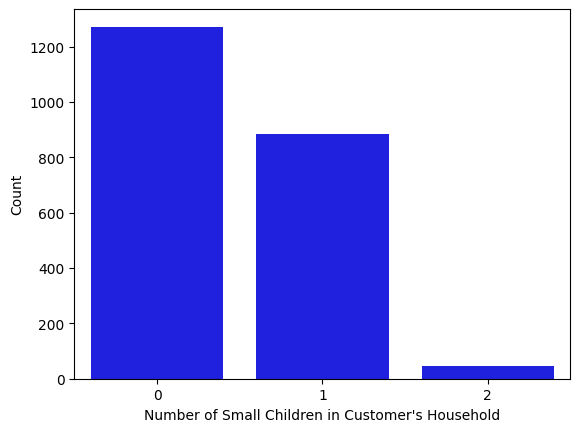

In [852]:
kidhome_counts = df['Kidhome'].value_counts().reset_index()
kidhome_counts.columns = ['Kidhome', 'Count']

sns.barplot(x='Kidhome', y='Count', data=kidhome_counts, color='blue')
plt.xlabel('Number of Small Children in Customer\'s Household')
plt.show()

## Teenhome


#### Use bar ploot to visualize the distribution of Teenhome


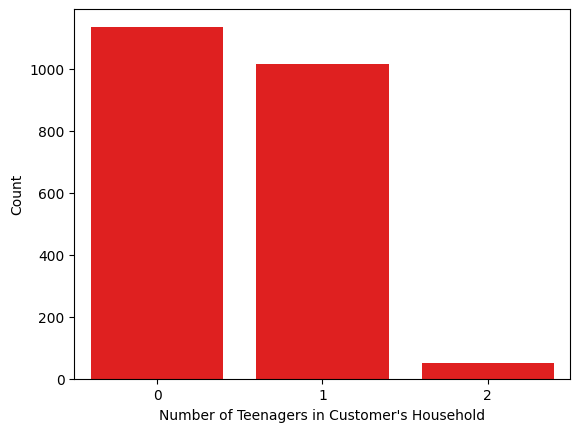

In [853]:
teenhome_counts = df['Teenhome'].value_counts().reset_index()
teenhome_counts.columns = ['Teenhome', 'Count']

sns.barplot(x='Teenhome', y='Count', data=teenhome_counts, color='red')
plt.xlabel('Number of Teenagers in Customer\'s Household')
plt.show()

## Preprocess Kidhome and Teenhome


#### Create new column for the total children


In [854]:
df['Total_Children'] = df['Kidhome'] + df['Teenhome']
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,...,189,218,1,4,4,6,1,1,0,0
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,...,0,37,1,7,3,7,5,1,0,0
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,...,2,30,1,3,2,5,2,0,0,1
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05 00:00:00,0,10,...,0,0,1,1,0,2,7,0,0,2
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04 00:00:00,0,6,...,0,34,2,3,1,2,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03 00:00:00,99,372,...,48,78,2,5,2,11,4,0,0,1
2236,5263,1977,2n Cycle,Married,31056.0,1,0,1/22/13,99,5,...,8,16,1,1,0,3,8,0,0,1
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12 00:00:00,99,185,...,5,14,2,6,1,5,8,0,0,1
2238,528,1978,Graduation,Married,65819.0,0,0,11/29/12,99,267,...,165,63,1,5,4,10,3,0,0,0


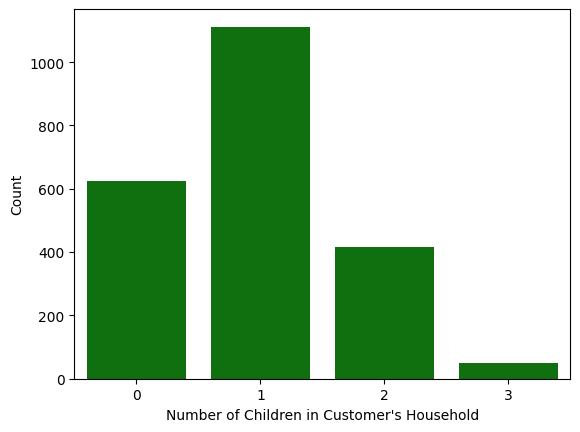

In [855]:
children_counts = df['Total_Children'].value_counts().reset_index()
children_counts.columns = ['Total_Children', 'Count']

sns.barplot(x='Total_Children', y='Count', data=children_counts, color='green')
plt.xlabel('Number of Children in Customer\'s Household')
plt.show()

## Dt_Customer


#### Check if there are invalid dates


In [856]:
df[df['Dt_Customer'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children


#### Convert Dt_Customer values to datetime and create another column for days since customer


In [857]:
from datetime import datetime

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')

current_date = datetime.now()
df['Days since Customer'] = (current_date - df['Dt_Customer']).dt.days

df

C:\Users\JOSHUA KYLE\AppData\Local\Temp\ipykernel_14644\91912030.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children,Days since Customer
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,218,1,4,4,6,1,1,0,0,3538
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,37,1,7,3,7,5,1,0,0,3539
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,30,1,3,2,5,2,0,0,1,3572
3,1386,1967,Graduation,Together,32474.0,1,1,2014-11-05,0,10,...,0,1,1,0,2,7,0,0,2,3396
4,5371,1989,Graduation,Single,21474.0,1,0,2014-08-04,0,6,...,34,2,3,1,2,7,1,0,1,3489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,2013-07-03,99,372,...,78,2,5,2,11,4,0,0,1,3886
2236,5263,1977,2n Cycle,Married,31056.0,1,0,2013-01-22,99,5,...,16,1,1,0,3,8,0,0,1,4048
2237,22,1976,Graduation,Divorced,46310.0,1,0,2012-03-12,99,185,...,14,2,6,1,5,8,0,0,1,4364
2238,528,1978,Graduation,Married,65819.0,0,0,2012-11-29,99,267,...,63,1,5,4,10,3,0,0,0,4102


#### Check if there are future dates than current date


In [858]:
df[df['Dt_Customer'] > current_date]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children,Days since Customer


#### Check if there are customer dates that are older than customer's year of birth


In [859]:
df[~df.apply(
    lambda row: row['Dt_Customer'].year > row['Year_Birth'], axis=1)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Response,Complain,Total_Children,Days since Customer


#### Check what is the youngest and oldest age of when they first became a customer


In [860]:
df['Age_at_Customer_Date'] = df['Dt_Customer'].dt.year - df['Year_Birth']

print("Youngest Age as First Time Customer: ",
      df['Age_at_Customer_Date'].min())
print("Oldest Age as First Time Customer: ", df['Age_at_Customer_Date'].max())

Youngest Age as First Time Customer:  16
Oldest Age as First Time Customer:  73


## Recency


#### Check the descriptive statistics of Recency


In [861]:
df['Recency'].describe()

count    2201.000000
mean       49.045888
std        28.927263
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

#### Use histplot to visualize Recency


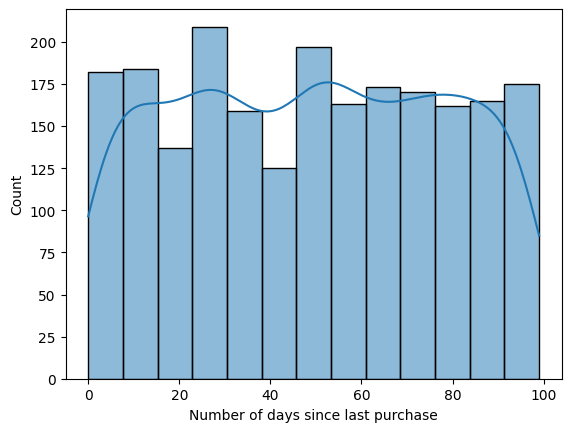

In [862]:
sns.histplot(df['Recency'], kde=True)
plt.xlabel('Number of days since last purchase')
plt.show()

## One-Hot Encoding


In [863]:
def one_hot_encode(data, column):
    encoded = pd.get_dummies(data[column], drop_first=True)
    data = data.drop(column, axis=1)
    data = data.join(encoded)
    return data

In [864]:
df = one_hot_encode(df, 'Education')
df = one_hot_encode(df, 'Marital_Status')
df

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Days since Customer,Age_at_Customer_Date,Basic,Graduation,Master,PhD,Married,Single,Together,Widow
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,...,3538,44,False,True,False,False,False,False,False,False
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,3539,53,False,True,False,False,False,True,False,False
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,3572,56,False,True,False,False,True,False,False,False
3,1386,1967,32474.0,1,1,2014-11-05,0,10,0,1,...,3396,47,False,True,False,False,False,False,True,False
4,5371,1989,21474.0,1,0,2014-08-04,0,6,16,24,...,3489,25,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,66476.0,0,1,2013-07-03,99,372,18,126,...,3886,37,False,False,False,True,False,False,False,False
2236,5263,1977,31056.0,1,0,2013-01-22,99,5,10,13,...,4048,36,False,False,False,False,True,False,False,False
2237,22,1976,46310.0,1,0,2012-03-12,99,185,2,88,...,4364,36,False,True,False,False,False,False,False,False
2238,528,1978,65819.0,0,0,2012-11-29,99,267,38,701,...,4102,34,False,True,False,False,True,False,False,False


## Export to parquet


In [865]:
df.to_parquet('parquet/kess.parquet', engine='pyarrow', index=False)